In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Making dataset

-1

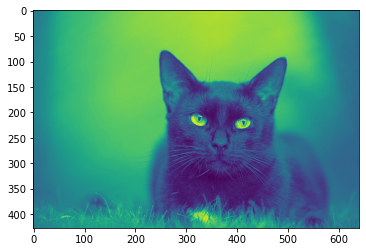

In [23]:
path=cv2.imread("dataset\\Cat\\1.jpg",cv2.IMREAD_GRAYSCALE)
#print(path)
plt.imshow(path)
cv2.waitKey(1000)

dataset
['Cat', 'Dog', 'Laptop', 'New folder']
dataset\Cat
dataset\Dog
dataset\Laptop
dataset\New folder
[array([[103, 106, 108, ..., 104, 101,  96],
       [104, 108, 110, ..., 106, 102,  98],
       [106, 107, 112, ..., 104, 100,  98],
       ...,
       [113, 103, 126, ...,  98, 105, 102],
       [109, 116, 110, ...,  95,  96, 111],
       [104, 115, 109, ...,  94,  75, 106]], dtype=uint8), array([[ 86,  76,  45, ...,  18,  17,  19],
       [ 48,  63,  34, ...,  12,  15,  16],
       [ 42,  43,  35, ...,  17,  20,  15],
       ...,
       [ 48, 152, 147, ..., 128, 118,  99],
       [ 24, 125,  98, ..., 100, 104,  94],
       [ 27,  38, 103, ...,  97,  80,  77]], dtype=uint8), array([[115, 122, 126, ..., 158, 161, 157],
       [111, 117, 121, ..., 169, 166, 161],
       [106, 111, 115, ..., 166, 165, 161],
       ...,
       [205, 202, 199, ..., 164, 167, 152],
       [202, 202, 206, ..., 167, 157, 161],
       [208, 209, 222, ..., 152, 175, 158]], dtype=uint8), array([[123, 131, 136

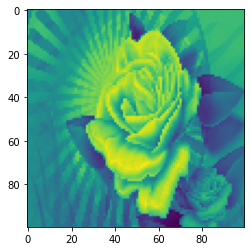

In [24]:
dataset_dir_path="dataset"
print(dataset_dir_path)

print(os.listdir(dataset_dir_path))
categories=os.listdir(dataset_dir_path)

img_array_list=[]
obj_category=[]
img_size=100

for category in categories:
    path=os.path.join(dataset_dir_path,category)
    class_num=categories.index(category)
    print(path)
    
    for img in os.listdir(path):
        try: 
            p=os.path.join(path,img) #making a path to the categories directories
            img_array=cv2.imread(p,cv2.IMREAD_GRAYSCALE)

            #Resizing the image
            img_array=cv2.resize(img_array,(img_size,img_size))

            plt.imshow(img_array)
            img_array_list.append(img_array)
            obj_category.append(category)
        except Exception as e:
            pass
        
print(img_array_list)

-1

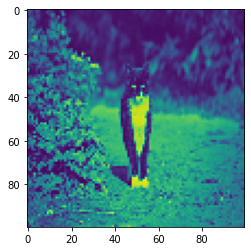

In [27]:
plt.imshow(img_array_list[1])
cv2.waitKey(10000)

# Making a dict object from img list and category list:

In [28]:
info={"images":img_array_list,"category":obj_category}

# Making Dataframe from the above dict object

In [29]:
df=pd.DataFrame(info)
df

,images,category
0,"[[103, 106, 108, 114, 119, 128, 139, 147, 156,...",Cat
1,"[[86, 76, 45, 32, 77, 57, 12, 10, 10, 30, 43, ...",Cat
2,"[[115, 122, 126, 126, 128, 130, 131, 133, 138,...",Cat
3,"[[123, 131, 136, 139, 142, 144, 145, 149, 151,...",Cat
4,"[[107, 110, 112, 115, 125, 137, 137, 135, 145,...",Cat
5,"[[49, 50, 47, 56, 54, 52, 57, 54, 57, 54, 58, ...",Cat
6,"[[52, 46, 48, 48, 48, 51, 50, 51, 48, 48, 50, ...",Cat
7,"[[229, 229, 229, 229, 229, 229, 229, 229, 229,...",Cat
8,"[[194, 176, 177, 179, 179, 180, 181, 182, 183,...",Cat
9,"[[69, 70, 74, 76, 79, 80, 81, 82, 78, 65, 57, ...",Dog
